In [1]:
import pylab as pl
import pandas as pd
import geopandas as gp
import numpy as np
import scipy.stats
import os
import json
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt

#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

#imports function for Google API
from get_jsonparsed_data import get_jsonparsed_data

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
getCitiBikeCSV('201501')

file in place, you can continue


In [3]:
dfjan = pd.read_csv(os.getenv("PUIDATA") + "/" + '201501' + '-citibike-tripdata.csv')
#dfjan.head()

In [4]:
dfjan.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [7]:
dfjan['age'] = 2015 - dfjan['birth year'][(dfjan['usertype'] == 'Subscriber')]

In [8]:
dfjan['date'] = pd.to_datetime(dfjan['starttime'])

In [75]:
dfjan['tripMINUTES'] = round(dfjan['tripduration'] / 60, 1)
#dfjan.head()

In [11]:
hourscalc = lambda x: round(x/3600, 1)

In [76]:
dfjan['tripHOURS'] = hourscalc(dfjan['tripduration'])
#dfjan.head()

In [13]:
dfjan.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age', 'date', 'tripMINITUES', 'tripMINUTES',
       'tripHOURS'],
      dtype='object')

In [19]:
dfjan.drop(['start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
        'tripMINITUES'],axis=1, inplace=True)

In [20]:
dfjan.columns

Index(['tripduration', 'starttime', 'stoptime', 'usertype', 'birth year',
       'gender', 'age', 'date', 'tripMINUTES', 'tripHOURS'],
      dtype='object')

In [50]:
dfjan=dfjan[dfjan['age']<70] #clearing out values > 70
dfjan=dfjan[dfjan['tripMINUTES']>45] #clearing

In [52]:
dfjan['age'].max()
dfjan['tripMINUTES'].min()

45.100000000000001

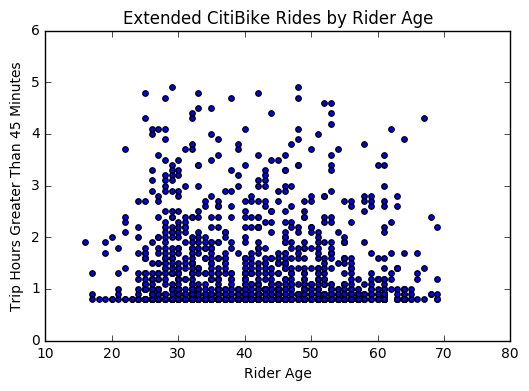

In [70]:
ax = dfjan.plot.scatter(y="tripHOURS", x="age", s=15)
ax.set_ylim(0,6)
ax.set_xlim(10,80)
ax.set_xlabel("Rider Age")
ax.set_ylabel("Trip Hours Greater Than 45 Minutes")
ax.set_title("Extended CitiBike Rides by Rider Age")
pl.show()


In [62]:
def fit_line1( x, y):
    """Return slope, intercept of best fit line."""
    #print x
    X = sm.add_constant(x)
    #print X
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0], fit 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tripHOURS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.896
Date:                Thu, 27 Oct 2016   Prob (F-statistic):            0.00291
Time:                        12:06:06   Log-Likelihood:                -1543.6
No. Observations:                1246   AIC:                             3091.
Df Residuals:                    1244   BIC:                             3101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.6588      0.090     18.368      0.000         1.482     1.836
age           -0.0062      0.002     -2.983      0.003        -0.010    -0.002
==============================================================================
Omnibus:                      445.167   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1258.611
Skew:                           1.870   Prob(JB):                    4.97e-274
Kurtosis:                       6.202   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

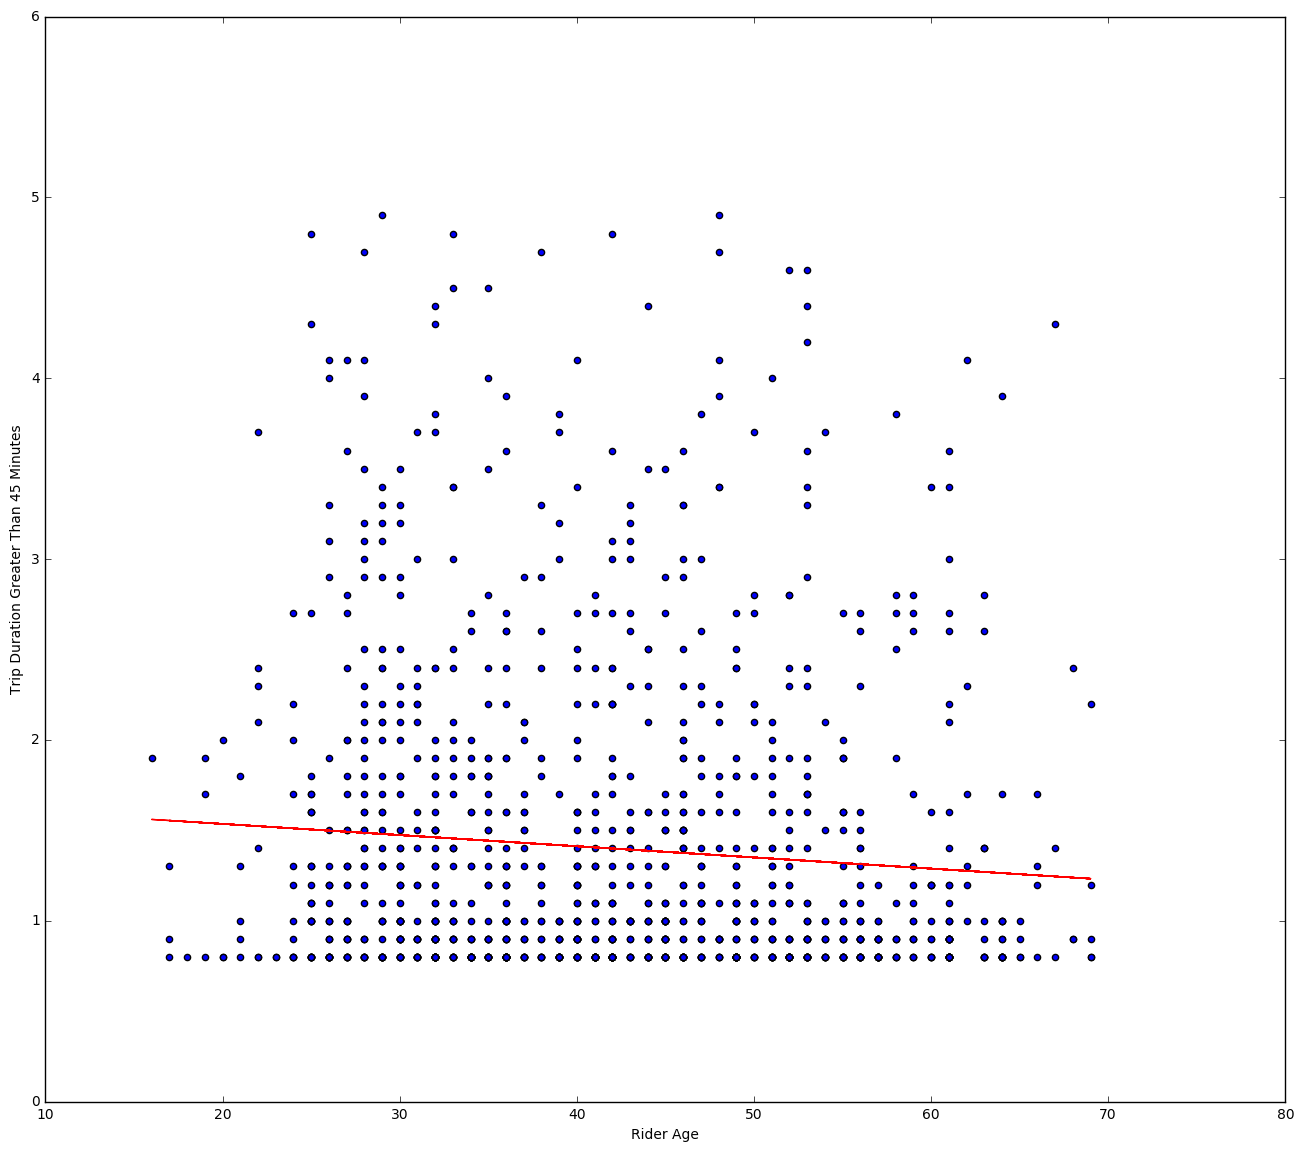

In [74]:
p1,p0,fit = fit_line1((dfjan.age),(dfjan.tripHOURS))
pl.figure(figsize=(16, 14))
pl.scatter((dfjan.age),(dfjan.tripHOURS))
plot((dfjan.age), fit.predict(), '-r')
pl.xlabel("Rider Age")
pl.ylabel("Trip Duration Greater Than 45 Minutes")
fit.summary()

# Figure 1: 

Above is a scatter plot of CitiBike Rider Age Distribution for trips longer than 45 minutes and less than 5 hours from January 2015. Since CitiBike charges a fine for rides lasting longer than 45 minutes, the plot shows that as Rider Age increases the number of fines decreases.